# IF240 - Apprentissage et deep learning

## Practice 1: Kmeans algorithm

By Aurélie Bugeau
Credits:  Chris Piech and Andrew Ng

K-Means is an algorithm that takes aims at clustering a given dataset into $k$ groups (called clusters) of data similar to each other. Each cluster is characterized by its centroid. 
In this practice, you are going to implement the kmeans algorithm and apply it on different dataset.

1. Read and understand the kmeans function below
2. Complete the following functions
3. Experiment and validate on a toy dataset

In [1]:
import numpy as np

# Function: K Means
# -------------
def kmeans(dataSet, k, MAX_ITERATIONS=5):
    
    centroids = getRandomCentroids(dataSet, k)
    iterations = 0
    oldCentroids = None
    
    while not shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
        oldCentroids = centroids
        iterations += 1
        labels = getLabels(dataSet, centroids)
        centroids = getCentroids(dataSet, labels, k)
    
    return centroids, labels

In [2]:
# Function: getRandomCentroids
# -------------
# Initialize centroids by choosing randomly k points from the dataset
def getRandomCentroids(dataSet, numClusters):
    numPoints, _ = dataSet.shape
    centroids = dataSet[np.random.randint(numPoints, size =  numClusters), :]
    return centroids

In [3]:
# Function: shouldStop
# -------------
# Returns True or False if k-means if the maximum number of iterations is reached 
# or if the centroids do not change anymore
def shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
    if (iterations > MAX_ITERATIONS): 
        return True
    return np.array_equal(oldCentroids, centroids)

In [4]:
# Function: getDistance
# -------------
# Returns the distance between two points
def getDistance(point1, point2):
    return np.linalg.norm(point1-point2)

In [5]:
# Function: getLabels
# -------------
# Returns the label for each point in the dataSet. The label is the one of the closest centroid
def getLabels(dataSet, centroids):
    numPoints, _ = dataSet.shape
    labels = np.zeros(numPoints)
    
    for i in range(numPoints) : 
        labels[i] = np.argmin([getDistance(dataSet[i], c) for c in centroids])
        
    return labels

In [6]:
# Function: getCentroids
# -------------
# Returns the centroids of the clusters. Each centroid is the geometric mean of the points that
# have that centroid's label. Important: If a centroid is empty (no points have
# that centroid's label) you should randomly re-initialize it.
def getCentroids(dataSet, labels, k):
    newCentroids = []
    uniqueCentroids = np.unique(labels)

    for c in uniqueCentroids:
        indexs = np.where(labels == c)
        newCentroid = np.mean([dataSet[i] for i in indexs], axis=1)
        newCentroids.append(newCentroid[0])
        
    resulted_k = len(newCentroids)
    if (resulted_k < k):
        numPoints, _ = dataSet.shape
        np.append(newCentroids, dataSet[np.random.randint(numPoints, size =  k - resulted_k), :])
        
    return np.array(newCentroids)

### Toy dataset

Experiment your algorithm on different sets of points with different values of $k$. <span style="color:red">Analyze you results</span>.

In [7]:
x1 = np.array([1, 1])
x2 = np.array([2, 2])
x3 = np.array([3, 3])
x4 = np.array([4, 4])
testX = np.vstack((x1, x2, x3, x4))
result = kmeans(testX, 4)
print(result)

(array([[1.5, 1.5],
       [4. , 4. ],
       [3. , 3. ]]), array([0., 0., 2., 1.]))


Les différentes valeurs de $k$ : 

 **$k$=1** : Le comportement attendu de l'algorithme **Kmeans** est de créer un seul centre qui coincide avec la moyenne des 4 points $(2.5, 2.5)$. Ceci est compatible avec les données de sortie : `(array([[2.5, 2.5]]), array([0., 0., 0., 0.]))`
 
  **$k$=2** : Le comportement attendu de l'algorithme **Kmeans** est de créer deux centres $(1.5, 1.5)$ et $(3.5, 3.5)$ qui coincideront respectivement aux moyennes d'un groupe de deux points proches. Ceci est compatible avec les données de sortie : `(array([[1.5, 1.5], [3.5, 3.5]]), array([0., 0., 1., 1.]))`
  
  **$k$=3** : Le comportement attendu de l'algorithme **Kmeans** est de créer trois centres qui coincideront avec deux points de l'ensemble des points et la moyenne de deux points proches. Ceci est compatible avec les données de sortie : `(array([[2. , 2. ], [1. , 1. ], [3.5, 3.5]]), array([1., 0., 2., 2.]))`
  
  **$k$=4** : Le comportement attendu de l'algorithme **Kmeans** est de créer 4 centres qui coincide avec les 4 points de l'ensemble d'entrée. Ceci est compatible avec les données de sortie : `(array([[2., 2.],[4., 4.],[1., 1.],[3., 3.]]), array([2., 0., 3., 1.]))`
 

### 2D Point Cloud
You are now going to test and plot the result on a 2D point cloud

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

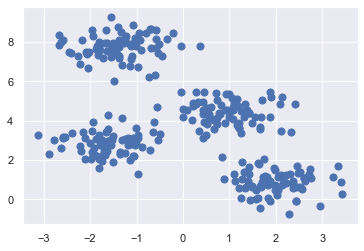

In [9]:
# dataset generation
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
#plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis');

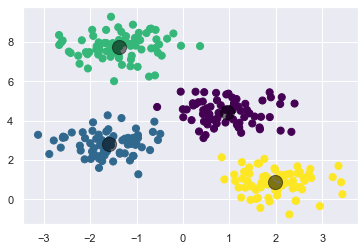

In [12]:
# Apply kmeans
centers, labels = kmeans(X, 4)

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#print(centers)
#print(labels)

#### Scikit-learn library
The Scikit-learn library proposes many functions for machine learning. You are going to compare the results obtained by your implementation with the ones from this library. 

* Study the documentation of the KMeans function and apply it to the 2D dataset.
* Compare

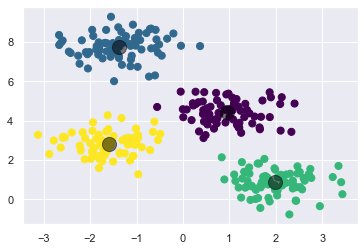

In [13]:
from sklearn.cluster import KMeans

kmeanInstance = KMeans(n_clusters=4, init='random').fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeanInstance.labels_, s=50, cmap='viridis')

plt.scatter(kmeanInstance.cluster_centers_[:, 0], kmeanInstance.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);

#print(kmeanInstance.cluster_centers_)
#print(kmeanInstance.labels_)

Les deux implémentations de **Kmeans** donnent le même résultat (_même centres et labels_). Le résultat retrouvé est le même prévu à première vue.

### 2 moons problem
Observe and explain the clustering in 2 classes obtained on the following dataset

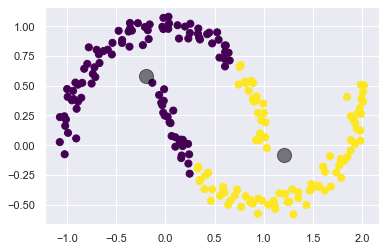

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

moonInstance = KMeans(n_clusters=2, init='k-means++').fit(X)

plt.scatter(X[:, 0], X[:, 1], c=moonInstance.labels_, s=50, cmap='viridis')

plt.scatter(moonInstance.cluster_centers_[:, 0], moonInstance.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);


Le clustring obtenu lors de l'éxecution de l'algorithme **Kmeans** n'est pas celui attendu. En effet, il n'a pas pu séparer les deux "moons", mais il s'est basé sur les distances et ne prend pas en considération la forme des clustrers.

### 3D Point Cloud
Observe and explain the clustering on a 3D point cloud (<span style="color:red">Analyze you results</span>)

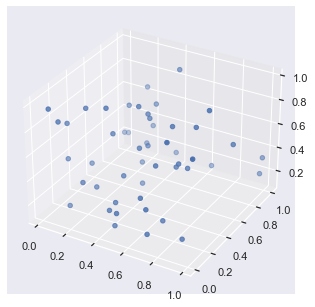

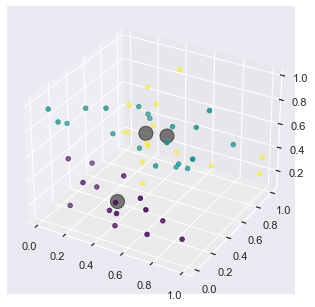

In [20]:
from mpl_toolkits.mplot3d import Axes3D
originalFig = plt.figure()
ax1 = Axes3D(originalFig)
X = np.random.rand(50,3)
ax1.scatter(X[:, 0], X[:, 1],X[:, 2], s=20)

pointCloudInstance = KMeans(n_clusters=3, init='k-means++').fit(X)

clusteringFig = plt.figure()
ax2 = Axes3D(clusteringFig)
ax2.scatter(X[:, 0], X[:, 1],X[:, 2], c=pointCloudInstance.labels_, s=20, cmap='viridis')
ax2.scatter(pointCloudInstance.cluster_centers_[:, 0], pointCloudInstance.cluster_centers_[:, 1], pointCloudInstance.cluster_centers_[:, 2], c='black', s=200, alpha=0.5)
plt.show();

**Kmeans** permet de diviser l'ensemble des points d'entrée en $k$ clusters représentés comme des nuages de points condensés.